In [1]:
import pandas as pd
import numpy as np
cat = pd.Categorical(['Small', 'Medium', 'Large'] * 10, ordered=True, categories=['Small', 'Medium', 'Large'])

In [2]:
index = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=index, columns=list('ABCD'))
df

,A,B,C,D
2023-01-01,-0.318654,-1.326428,-1.249225,0.623743
2023-01-02,-0.214703,0.164802,-0.764496,0.841187
2023-01-03,-1.487811,0.468423,0.654098,-1.934629
2023-01-04,-2.111778,-0.049372,-0.560436,0.747616
2023-01-05,1.195498,-0.600683,1.052027,0.341171
2023-01-06,-0.983669,-0.189344,-1.194626,0.903609


In [3]:
df2 = pd.DataFrame(
    {
        'A': 1.0,
        'B': pd.Timestamp('20230102'),
        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
        'D': np.array([3]*4, dtype='int32'),
        'E': pd.Categorical(['test', 'train'] * 2),
        'F': 'foo'

    }
)

df2

,A,B,C,D,E,F
0,1.0,2023-01-02,1.0,3,test,foo
1,1.0,2023-01-02,1.0,3,train,foo
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [4]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [5]:
df.head()

,A,B,C,D
2023-01-01,-0.318654,-1.326428,-1.249225,0.623743
2023-01-02,-0.214703,0.164802,-0.764496,0.841187
2023-01-03,-1.487811,0.468423,0.654098,-1.934629
2023-01-04,-2.111778,-0.049372,-0.560436,0.747616
2023-01-05,1.195498,-0.600683,1.052027,0.341171


In [6]:
df.tail(3)

,A,B,C,D
2023-01-04,-2.111778,-0.049372,-0.560436,0.747616
2023-01-05,1.195498,-0.600683,1.052027,0.341171
2023-01-06,-0.983669,-0.189344,-1.194626,0.903609


In [7]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2023-01-01,0.623743,-1.249225,-1.326428,-0.318654
2023-01-02,0.841187,-0.764496,0.164802,-0.214703
2023-01-03,-1.934629,0.654098,0.468423,-1.487811
2023-01-04,0.747616,-0.560436,-0.049372,-2.111778
2023-01-05,0.341171,1.052027,-0.600683,1.195498
2023-01-06,0.903609,-1.194626,-0.189344,-0.983669


In [8]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [9]:
df.pivot_table(values=['D'], index=['A', 'B'], columns='C', fill_value=0, aggfunc='sum')

D      
C       large small
A   B              
bar one     4     5
    two     7     6
foo one     4     1
    two     0     6

In [10]:
df.pivot_table(values=['D'], index=['A', 'B'], columns='C', fill_value=0)

D      
C       large small
A   B              
bar one     4     5
    two     7     6
foo one     2     1
    two     0     3

In [11]:
df.pivot_table(values=['D', 'E'], index=['A', 'B'], fill_value=0, aggfunc={'D':'sum', 'E':'mean'})

D         E
A   B                
bar one   9  7.000000
    two  13  9.000000
foo one   5  3.666667
    two   6  5.500000

In [12]:
df.pivot_table(values=['D', 'E'], index=['A', 'B'], fill_value=0, aggfunc={'D':'sum', 'E':['min', 'max', 'mean']})

D   E              
        sum max      mean min
A   B                        
bar one   9   8  7.000000   6
    two  13   9  9.000000   9
foo one   5   5  3.666667   2
    two   6   6  5.500000   5

## Pivot Table

In [13]:
import pandas as pd

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'Product': ['Electronics', 'Furniture', 'Clothing', 'Electronics', 'Clothing', 'Furniture', 'Electronics', 'Clothing'],
    'Month': ['Jan', 'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb'],
    'Sales': [2000, 1500, 1200, 2200, 1300, 1800, 2400, 1400],
    'Quantity': [20, 15, 12, 22, 13, 18, 24, 14]
}

df = pd.DataFrame(data)
df


,Region,Product,Month,Sales,Quantity
0,North,Electronics,Jan,2000,20
1,South,Furniture,Jan,1500,15
2,East,Clothing,Jan,1200,12
3,West,Electronics,Feb,2200,22
4,North,Clothing,Feb,1300,13
5,South,Furniture,Feb,1800,18
6,East,Electronics,Feb,2400,24
7,West,Clothing,Feb,1400,14


In [14]:
# Pivot Table: Total sales for each product in each region
sales_summary = df.pivot_table(index='Product', columns='Region', values='Sales', aggfunc='sum', fill_value=0)
sales_summary


Region,East,North,South,West
Product,,,,
Clothing,1200,1300,0,1400
Electronics,2400,2000,0,2200
Furniture,0,0,3300,0


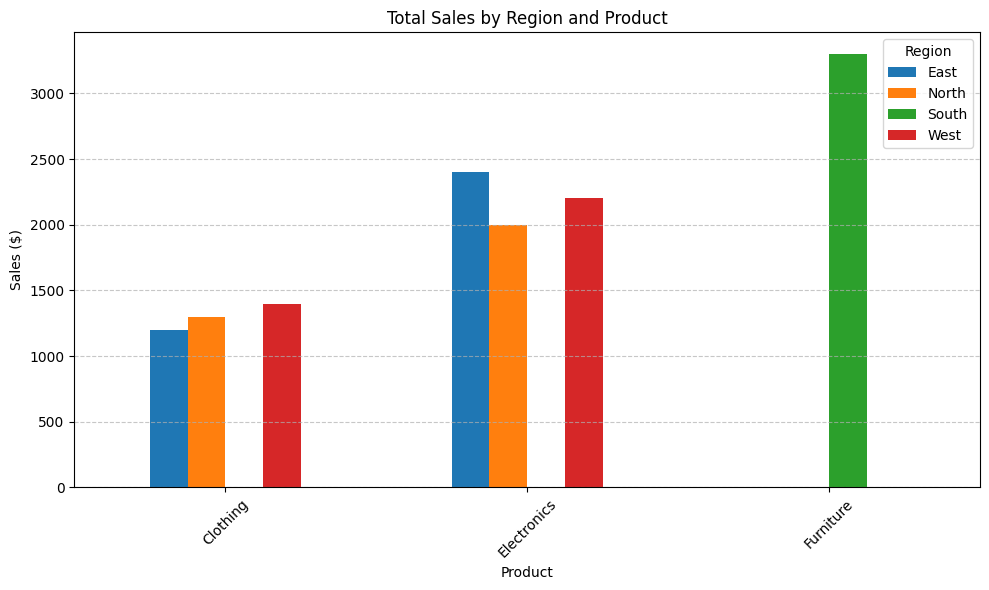

In [15]:
import matplotlib.pyplot as plt

# Use the sales_summary DataFrame
sales_summary.plot(kind='bar', figsize=(10, 6), title="Total Sales by Region and Product")
plt.xlabel("Product")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
# Pivot Table: Average quantity sold per product by month
quantity_avg = df.pivot_table(index='Product', columns='Month', values='Quantity', aggfunc='mean', fill_value=0)
quantity_avg


Month,Feb,Jan
Product,,
Clothing,13.5,12
Electronics,23.0,20
Furniture,18.0,15


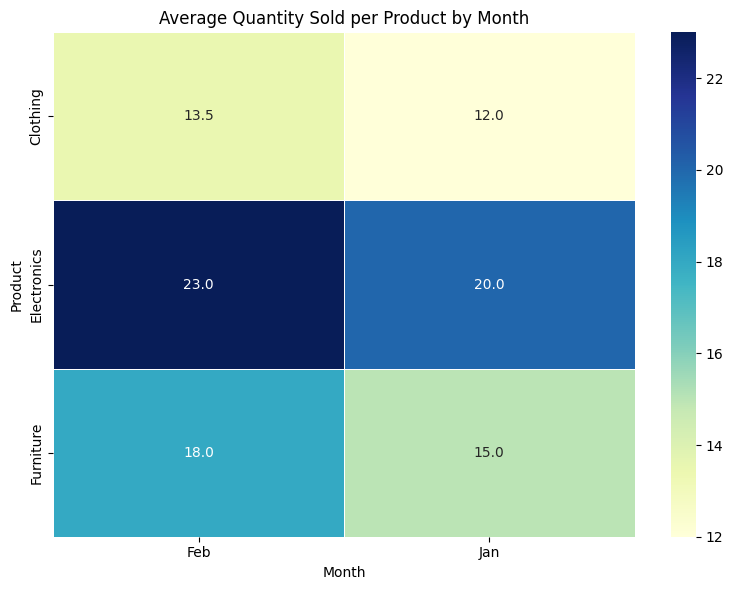

In [17]:
import seaborn as sns

# Use the quantity_avg DataFrame
plt.figure(figsize=(8, 6))
sns.heatmap(quantity_avg, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Quantity Sold per Product by Month")
plt.xlabel("Month")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


In [18]:
# Pivot Table: Total revenue contribution of each product in different regions
revenue_contribution = df.pivot_table(index='Product', columns='Region', values='Sales', aggfunc='sum', margins=True, fill_value=0)
print(revenue_contribution)


Region       East  North  South  West    All
Product                                     
Clothing     1200   1300      0  1400   3900
Electronics  2400   2000      0  2200   6600
Furniture       0      0   3300     0   3300
All          3600   3300   3300  3600  13800


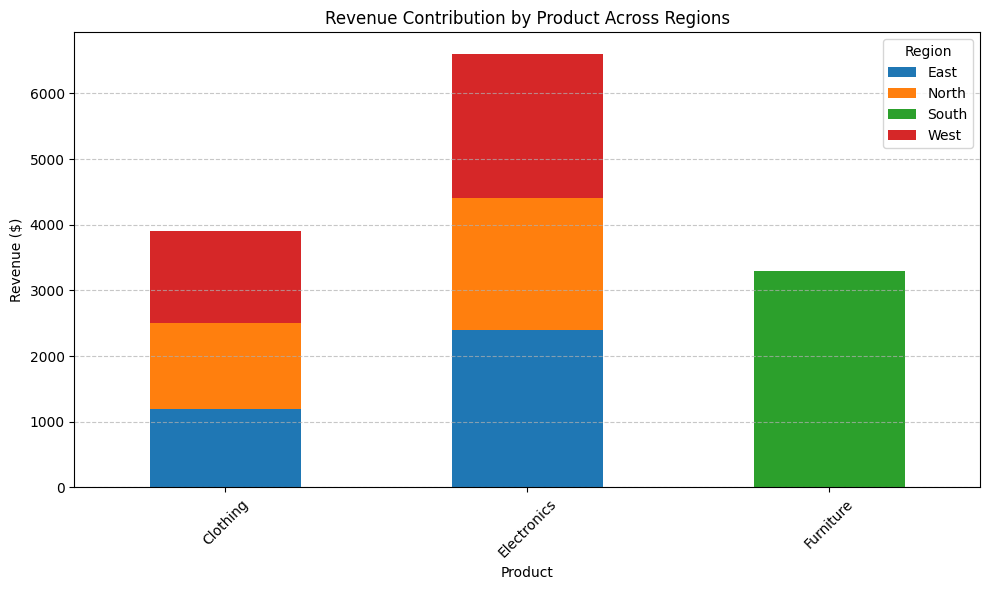

In [19]:
# Use the revenue_contribution DataFrame, excluding 'All' row and column
revenue_data = revenue_contribution.loc[revenue_contribution.index != 'All', revenue_contribution.columns != 'All']

revenue_data.plot(kind='bar', stacked=True, figsize=(10, 6), title="Revenue Contribution by Product Across Regions")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
# Pivot Table: Total sales and average quantity by region and product
combined_summary = df.pivot_table(
    index='Product',
    columns='Region',
    values=['Sales', 'Quantity'],
    aggfunc={'Sales': 'sum', 'Quantity': 'mean'},
    fill_value=0
)
combined_summary


Quantity                  Sales                  
Region          East North South West  East North South  West
Product                                                      
Clothing          12    13   0.0   14  1200  1300     0  1400
Electronics       24    20   0.0   22  2400  2000     0  2200
Furniture          0     0  16.5    0     0     0  3300     0

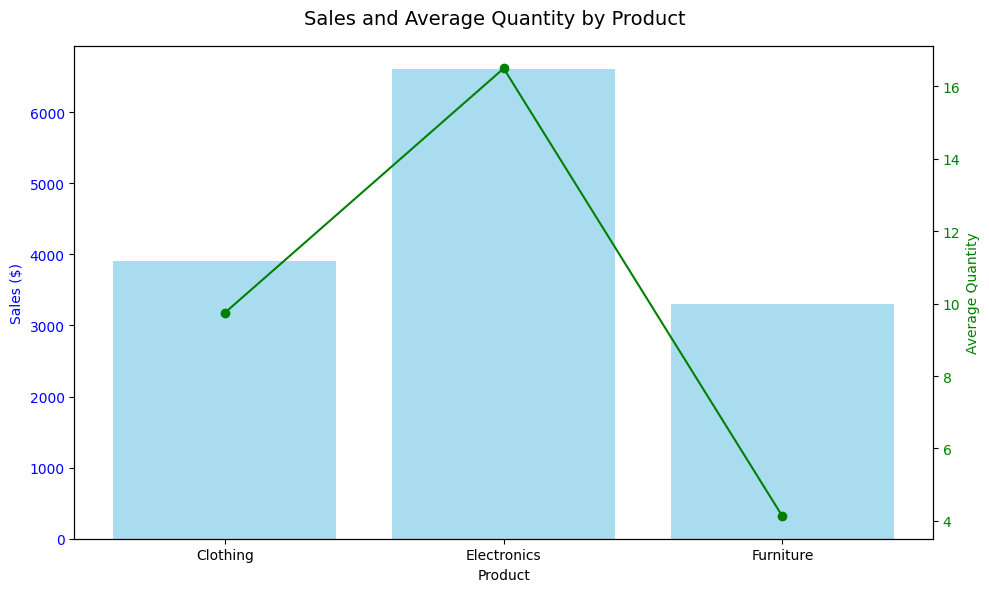

In [21]:
# Extract data for plotting
sales = combined_summary['Sales'].sum(axis=1)
quantity = combined_summary['Quantity'].mean(axis=1)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Sales bar plot
ax1.bar(sales.index, sales, color='skyblue', label='Total Sales ($)', alpha=0.7)
ax1.set_ylabel("Sales ($)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel("Product")

# Quantity line plot on secondary axis
ax2 = ax1.twinx()
ax2.plot(quantity.index, quantity, color='green', marker='o', label='Average Quantity')
ax2.set_ylabel("Average Quantity", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legend
fig.suptitle("Sales and Average Quantity by Product", fontsize=14)
fig.tight_layout()
plt.show()
